In [1]:
import numpy as np
import matplotlib.pyplot as plt
from coupler import *
from scipy import interpolate

In [2]:
lmin = 1530e-9
lmax = 1560e-9
N_l = 10
a = 5e-6
N_points = 1024
d = 0.5e-6
lp1 = 1549e-9
lp2 = 1555e-9
ls = 1551e-9
lbs = 1556e-9
lpc = 1554e-9
k01, k11, couple01 = create_coupling_coeff(lmin,lmax, N_l, a, N_points, d)

Maximum V number in space is 3.2501674851661546


In [3]:
fp1, fp2, fs, fbs, fpc = (c/i for i in (lp1, lp2, ls, lbs, lpc))
fv = np.linspace(c/lmax, c/lmin, 4096)

In [4]:
ratio = k11/ k01

In [5]:
kinter = interpolate.interp1d(couple01.f_vec, k01, kind = 'cubic')
ratio_inter = interpolate.interp1d(couple01.f_vec, ratio, kind = 'cubic')

In [6]:
def required_dist(k, f1, f2):
    return (pi/2) /  (k(f2) - k(f1))

In [7]:
coupling_distance = required_dist(kinter, fp1, fs)

In [8]:
def smr_coeff(z, kinter, fv, ratio_inter, g):
    gv = g(fv, z, kinter, ratio_inter)
    A = np.array([[np.cos(gv), 1j * np.sin(gv)], [1j * np.sin(gv), np.cos(gv)]])
    return A

In [9]:
def g_LP01(fv, z, kinter, ratio):
    return kinter(fv) * z

def g_LP11(fv, z, kinter, ratio):
    return ratio(fv) * kinter(fv) * z

In [10]:
co = smr_coeff(coupling_distance, kinter, fv, ratio_inter,  g_LP01)
c2 = smr_coeff(coupling_distance, kinter, fv, ratio_inter,  g_LP11)

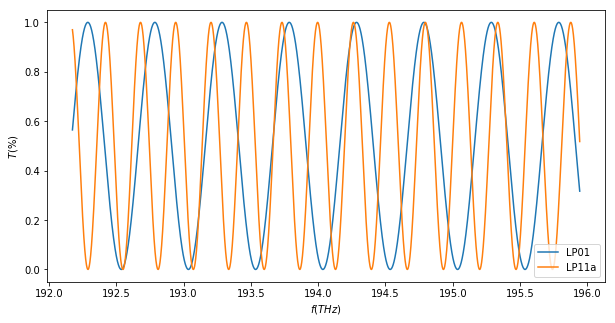

In [11]:
fig = plt.figure(figsize = (10,5))
plt.plot(fv*1e-12, np.abs(co[0][0])**2, label = 'LP01')
plt.plot(fv*1e-12, np.abs(c2[0][0])**2, label = 'LP11a')
plt.xlabel(r'$f(THz)$')
plt.ylabel(r'$T(\%)$')
plt.legend()
plt.show()

In [12]:
(fv[1] - fv[0])*1e-9


0.92017837421875004

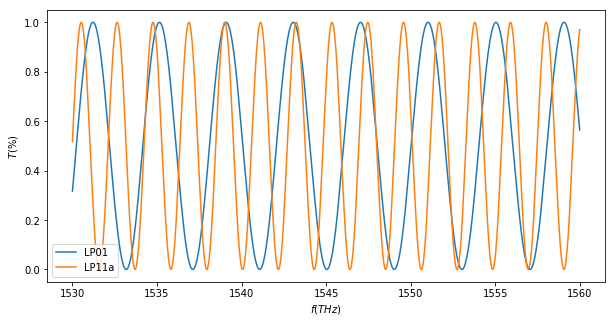

In [13]:
lv = 1e9* c / fv
fig = plt.figure(figsize = (10,5))
plt.plot(lv, np.abs(co[0][0])**2, label = 'LP01')
plt.plot(lv, np.abs(c2[0][0])**2, label = 'LP11a')
plt.xlabel(r'$f(THz)$')
plt.ylabel(r'$T(\%)$')
plt.legend()
plt.show()

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


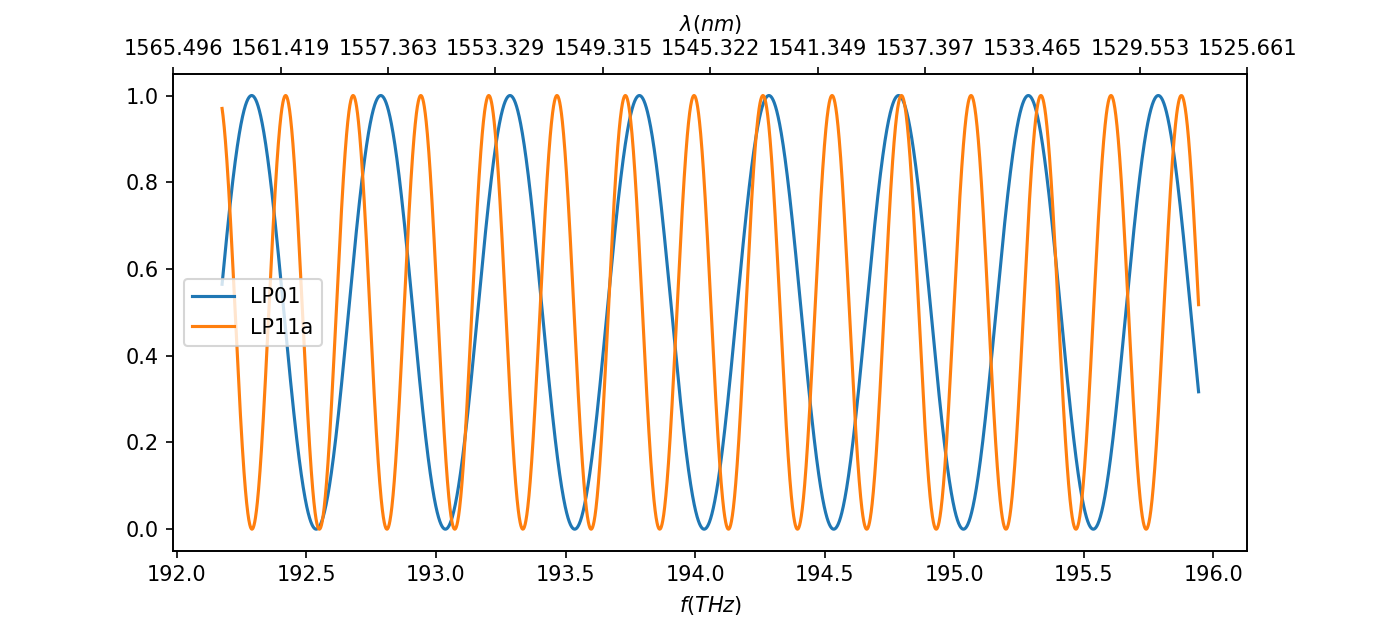

In [17]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

l1 = ax1.plot(fv*1e-12, np.abs(co[0][0])**2, label = 'LP01')
l2 = ax1.plot(fv*1e-12, np.abs(c2[0][0])**2, label = 'LP11a')
ax1.set_xlabel(r'$f(THz)$')

new_tick_locations = ax1.get_xticks()

def tick_function(X):
    V = 1e-3*c/(X)
    return ["%.3f" % z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r'$\lambda(nm)$')
ax1.legend()
#plt.show()